## 1 - Perkenalan

### Group 6
1. Fahmi Suwandhi,
2. Dhanan Pradipta, 
3. Ryo Tjokrosoedomo, 
4. Fadhil Muhammad Irfan

### Tujuan
- Membuat rekomendasi sistem tujuan wisata dari seorang user berdasarkan data historis dari tempat yang pernah ia kunjungi dan "review" menggunakan Artificial Neural Network (ANN)
- Membuat program rekomendasi berdasarkan jenis cluster terbanyak dari "user" pernah kunjungi dan menampilkan rekomendasi tempat wisata yang dia belum pernah kunjungi berdasarkan cluster tersebut 

## 2 - Import Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 3 - Data Loading

In [40]:
rating = pd.read_csv('tourism_rating.csv')
rating_copy = rating.copy()

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [41]:
tourism = pd.read_csv('tourism_cluster.csv')
tourism_copy = tourism.copy()

tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,3
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2,5
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3,7
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4,7
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5,1


Query tiap cluster agar terbaca tiap pola dari cluster yang ada

In [42]:
df = tourism[['Place_Name','Category','cluster']]
cluster1 = df[df['cluster']==0]
cluster2= df[df['cluster']==1]
cluster3 = df[df['cluster']==2]
cluster4 = df[df['cluster']==3]
cluster5 = df[df['cluster']==4]
cluster6 = df[df['cluster']== 5]
cluster7 = df[df['cluster']==6]
cluster8 = df[df['cluster']==7]
cluster9 = df[df['cluster']==8]

Dari hasil query dapat disimpulkan bahwa tiap cluster mempunyai arti atau makna sebagai berikut: 
- cluster 0 : Others
- cluster 1 : Hiburan Keluarga dan Wisata Air
- cluster 2 : Desa dan Perkebunan
- cluster 3 : Nilai Budaya, Sejarah
- cluster 4 : Wisata Bahari
- cluster 5 : Museum
- cluster 6 : Tempat Ibadah dan Edukasi
- cluster 7 : Taman Hiburan
- cluster 8 : Wisata Alam

Makna dari tiap cluster akan di map kedalam kolom cluster

In [43]:
tourism['cluster'] = tourism['cluster'].map({0:'others',
                     1:'Hiburan Keluarga dan Wisata Air',
                     2:'Desa dan Perkebunan',
                     3:'Nilai Budaya dan Sejarah',
                     4:'Wisata Bahari',
                     5:'Museum',
                     6:'Tempat Ibadah dan Edukasi',
                     7:'Taman Hiburan',
                     8:'Wisata Alam'})

tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,Nilai Budaya dan Sejarah
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2,Museum
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4,Taman Hiburan
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5,Hiburan Keluarga dan Wisata Air


In [44]:
# Disimpan dalam file terpisah untuk Deployment

tourism.to_pickle("cluster.pkl") 

In [45]:
tourism = pd.read_pickle('cluster.pkl')
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,Nilai Budaya dan Sejarah
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2,Museum
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4,Taman Hiburan
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5,Hiburan Keluarga dan Wisata Air


## 4 - Exploration Data Analysis

In [46]:
print(rating.info())
print(tourism.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long        

- Berdasarkan `.info()` pada tabel rating tidak ada missing values
- Sedangkan untuk tabel tourism untuk fitur (Place_Id, Place_Name, Description, Category, City, Price, dan cluster) yang akan digunakan dalam membuat sistem ini, tidak ada missing values

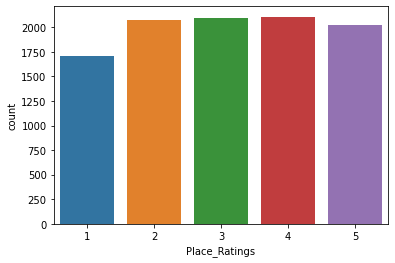

In [47]:
sns.countplot(data=rating, x='Place_Ratings')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

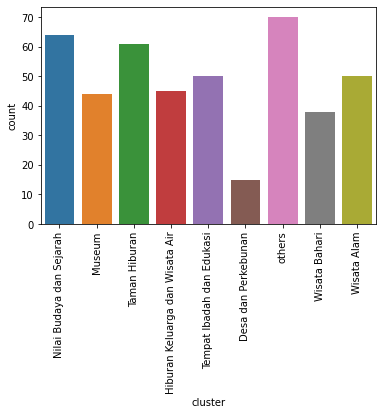

In [48]:
sns.countplot(data=tourism, x='cluster')
plt.xticks(rotation = 90)

## 5 - Data Preprocessing

Split data train dan validation

In [49]:
train, val = train_test_split(rating, test_size=0.1,random_state=42)

dim_place=rating.Place_Id.max()+1
dim_users=rating.User_Id.max()+1

## 6 - Model Definition and Training

In [60]:
place_input = Input(shape=(1,), name="place-Input")
place_embedding = Embedding(dim_place, 50, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-place")(place_embedding)
place_drop = Dropout(0.5)(place_vec)

user_input = Input(shape=(1,), name="User-Input")
user_embedding = Embedding(dim_users, 50, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
user_drop = Dropout(0.5)(user_vec)

prod = Dot(name="Dot-Product", axes=1)([place_drop, user_drop])
norm = BatchNormalization()(prod)

dense = Dense(1,activation='relu')(norm)

model = Model([user_input, place_input], dense)
model.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 place-Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 place-Embedding (Embedding)    (None, 1, 50)        21900       ['place-Input[0][0]']            
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 50)        15050       ['User-Input[0][0]']             
                                                                                            

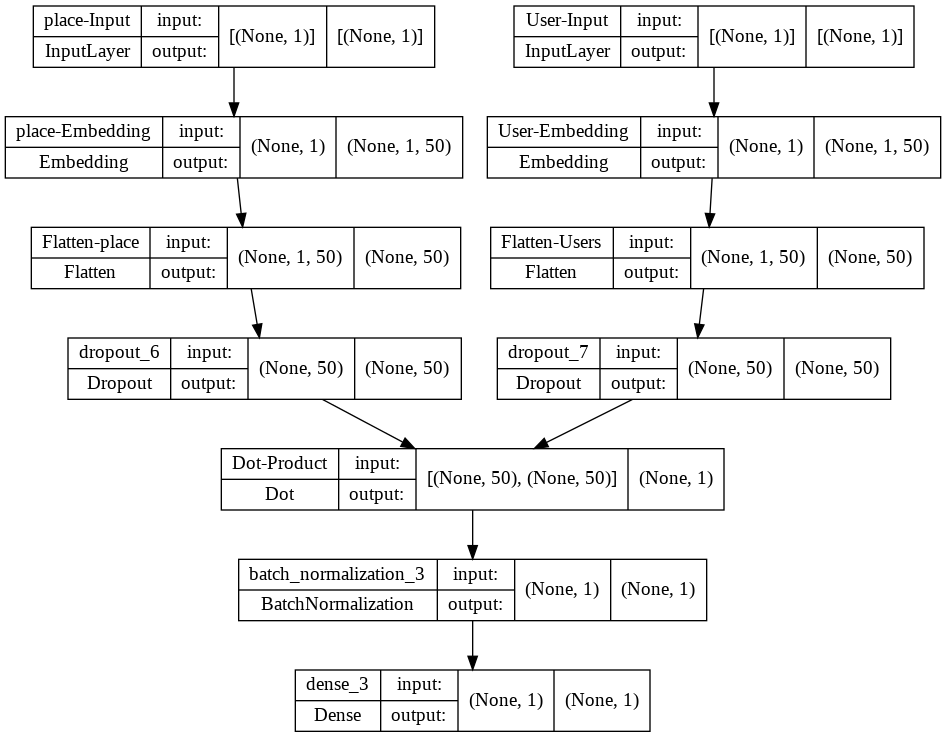

In [61]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [62]:
# Normalisasi label atau target
y_train=(train.Place_Ratings - rating.Place_Ratings.min()) / (rating.Place_Ratings .max() - rating.Place_Ratings.min())
y_val=(val.Place_Ratings  - rating.Place_Ratings.min()) / (rating.Place_Ratings.max() - rating.Place_Ratings.min())

# fit data train dan val
history = model.fit(x=[train.User_Id.values,train.Place_Id.values], 
                    y=y_train.values, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=([val.User_Id.values,val.Place_Id.values], y_val.values))

Epoch 1/10
141/141 [==============================] - 3s 8ms/step - loss: 0.5376 - mean_absolute_error: 0.5662 - val_loss: 0.3838 - val_mean_absolute_error: 0.5204
Epoch 2/10
141/141 [==============================] - 1s 6ms/step - loss: 0.3985 - mean_absolute_error: 0.5092 - val_loss: 0.3834 - val_mean_absolute_error: 0.5200
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.3575 - mean_absolute_error: 0.4864 - val_loss: 0.3771 - val_mean_absolute_error: 0.5157
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.3404 - mean_absolute_error: 0.4749 - val_loss: 0.3615 - val_mean_absolute_error: 0.5035
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.3247 - mean_absolute_error: 0.4623 - val_loss: 0.3430 - val_mean_absolute_error: 0.4881
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.3088 - mean_absolute_error: 0.4501 - val_loss: 0.3176 - val_mean_absolute_error: 0.4673
Epoch 7/10
141/1

## 7 - Model Evaluation

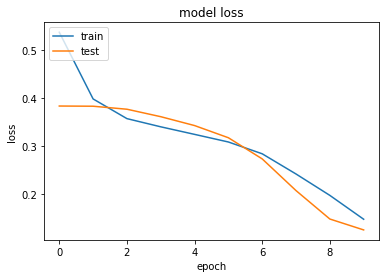

In [64]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Berdasarkan loss, model tidak overfit

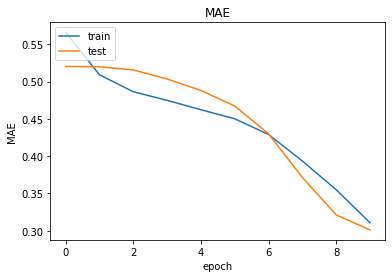

In [65]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history["val_mean_absolute_error"])
plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Berdasarkan nilai MAE, dapat diketahui bahwa error didalam program sejumlah 0.3 dari prediksi aktual

Menyimpan Model yang telah dibuat

In [55]:
# model.save('my_model.h5')

## 8 - Model Inference

In [66]:
rating = pd.read_csv('tourism_rating.csv')
tourism = pd.read_pickle('cluster.pkl')
tourism_cat = tourism[['Place_Id','Category', 'cluster']]
merge = pd.merge(rating, tourism_cat, on="Place_Id")

user = 1 # User Id
query_user = merge[merge['User_Id']==user][['User_Id', 'Place_Id', 'cluster']].groupby(['cluster'])['cluster'].count()
highest_cat = query_user.idxmax()
place_visited_by_user = rating[rating.User_Id == user]
place_visited = tourism[tourism['Place_Id'].isin(place_visited_by_user.Place_Id)][['Place_Id','Place_Name','cluster', 'Price', 'City']]
place_not_visited = tourism[~tourism['Place_Id'].isin(place_visited_by_user.Place_Id)][['Place_Id', 'cluster']]

In [67]:
print('Cluster : ', highest_cat)
print('*'*50)
if highest_cat == 'others':
    place_list = place_not_visited[place_not_visited['cluster'] == 'others']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Hiburan Keluarga dan Wisata Air':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Hiburan Keluarga dan Wisata Air']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Desa dan Perkebunan':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Desa dan Perkebunan']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Nilai Budaya dan Sejarah':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Nilai Budaya dan Sejarah']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Wisata Bahari':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Wisata Bahari']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Museum':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Museum']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Tempat Ibadah dan Edukasi':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Tempat Ibadah dan Edukasi']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Taman Hiburan':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Taman Hiburan']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

elif highest_cat == 'Wisata Alam':
    place_list = place_not_visited[place_not_visited['cluster'] == 'Wisata Alam']['Place_Id'].values
    user_1 = np.array([user for i in range(len(place_list))])
    #model = keras.models.load_model('my_model.h5')
    pred = model.predict([user_1,place_list])

    ids= (-pred).flatten().argsort()
    place_id = place_list[ids][:5]

else:
    print('in construction')

print('Rekomendasi tujuan wisata')
place_df = pd.DataFrame({'Reccomended_Id': place_id})
reccomended = tourism[tourism['Place_Id'].isin(place_df.Reccomended_Id)][['Place_Id','Place_Name','cluster', 'Price', 'City']]
reccomended

Cluster :  Museum
**************************************************
Rekomendasi tujuan wisata


,Place_Id,Place_Name,cluster,Price,City
81,82,Museum Satria Mandala,Museum,5000,Jakarta
227,228,Museum Sri Baduga,Museum,3000,Bandung
289,290,Museum Pendidikan Nasional,Museum,5000,Bandung
350,351,Old City 3D Trick Art Museum,Museum,50000,Semarang
412,413,Museum TNI AL Loka Jala Crana,Museum,2000,Surabaya


## 9 - Kesimpulan

- GYOTA merupakan Aplikasi Online Travel Agency berbasis deep learning, menggunakan metode recommendation system.
- Cluster tempat wisata dibedakan menjadi 9 kelompok, dimana masing-masing kelompok cluster memiliki pola kemiripan tertentu
- Aplikasi GYOTA memberikan rekomendasi tempat wisata yang belum dikunjungi berdasarkan history perjalanan, rating, dan juga cluster tempat wisata
